In [2]:
function f(x, t)
    return x
end


function euler_step(f, x0, tn, h, arg...)

    xn1 = x0 .+ h.*f(x0, tn)
    tn1 = tn .+ h

    return [xn1,tn1]
end


function rk4_step(f, x0, tn, h, arg...)

    k1 = h .* f(x0, tn, arg...)
    k2 = h .* f((x0 .+ h./2), (tn .+ k1./2), arg...)
    k3 = h .* f((x0 .+ h./2), (tn .+ k2./2), arg...)
    k4 = h .* f((x0 .+ h), (tn .+ k3), arg...)

    xn1 = x0 .+ (k1 .+ 2*k2 .+ 2*k3 .+ k4)./6
    tn1 = tn .+ h

    return [xn1, tn1]
end


function solve_to(f, x0, t1, t2, deltat_max, method, arg...)

    timesteps = floor((t2 - t1) / deltat_max)

    x = x0
    t = t1
    for i = 1:timesteps
        x, t = method(f, x, t, deltat_max, arg...)
    end

    if t != t2
        h = t2 - t
        x, t = method(f, x, t, h, arg...)
    end

    return x
end


function solve_ode(f, x0, t, method, deltat_max, arg...)

    x_series = Any[x0]
    x = x0
    for i = 1:(length(t)-1)
        
        x = solve_to(f, x, t[i], t[i + 1], deltat_max, method)
        push!(x_series, x)

    end

    return x_series
end

solve_ode (generic function with 1 method)

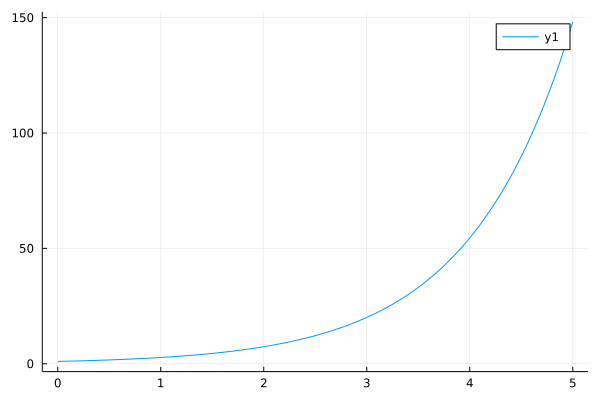

In [3]:
using Plots
t = 0:0.01:5
s1 = exp.(t)
s2 = solve_ode(f, 1, t, euler_step, 0.01)
s3 = solve_ode(f, 1, t, rk4_step, 0.001)

plot(t, s3)